In [1]:
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', (FutureWarning, np.VisibleDeprecationWarning))

**NULL HYPOTHESIS:** in the population, the distribution of immigrants is the same for pcc and elac. The difference is due to chance

**ALTERNATE HYPOTHESIS:** in the population the student body percentage of immigrants for pcc is higher than elac

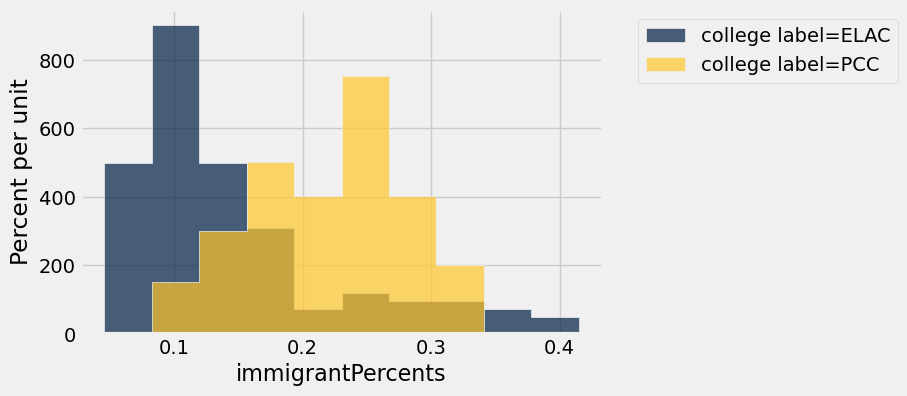

In [2]:
# This is an example of how the table should look like, these are just made up numbers so I can test the functions
college_table = Table().read_table('PCC_ELAC_immigration_percents_for_AB_testing.csv')

#drop the index column
college_table = college_table.drop('Unnamed: 0')

college_table.hist('immigrantPercents', group = 'college label')

In [3]:
#And then after grouping them by their average, this is how the table should look after

average_percentages = college_table.group("college label", np.average)
average_percentages

college label,immigrantPercents average
ELAC,0.143132
PCC,0.221019


In [4]:
# we can use this function to calculate the observed statistic (subtracting the two averages)

def observed_stat(tbl):
    avg_column = tbl.column(1)
    return avg_column.item(1) - avg_column.item(0)

observed_difference = observed_stat(average_percentages)
observed_difference

0.07788693957115009

In [5]:
#Then, we can shuffle the labels, and calculate a new test statistic

def one_test_stat(tbl):
    shuffled_labels = tbl.sample(with_replacement = False).column('college label')
    table_with_shuffled = tbl.with_column("Shuffled labels", shuffled_labels).drop("college label")
    shuffled_averages = table_with_shuffled.group('Shuffled labels', np.mean)
    return observed_stat(shuffled_averages)

one_test_stat(college_table)

0.009101559454190972

In [6]:
new_test_stats = make_array()

repetition = 10000

for i in np.arange(repetition):
    new_difference = one_test_stat(college_table)
    new_test_stats = np.append(new_test_stats, new_difference)
    
new_test_stats

array([ 0.0224825 , -0.00225088, -0.00200926, ..., -0.00492851,
       -0.02292183, -0.00656935])

The distribution below is calculated under the null hypothesis. The sample consists of 10000 values.

Observed Difference: 0.07788693957115009


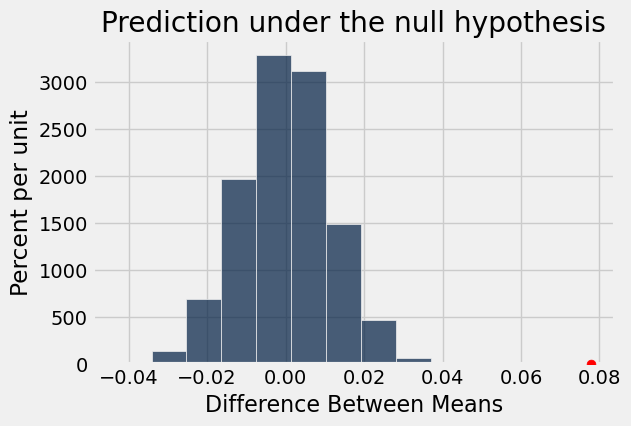

In [7]:
Table().with_column('Difference Between Means', new_test_stats).hist('Difference Between Means')
plots.title('Prediction under the null hypothesis')
plots.scatter(observed_difference, 0, color='red', s=40, zorder=3);
print('Observed Difference:', observed_difference)

In [8]:
#We can then calculate our p-value, and set it at 5% cut off
empirical_p = np.count_nonzero(new_test_stats >= observed_difference) / repetition
empirical_p

0.0

The observed data does not even show up within the distribution of the histogram which is why we get an empirical p-value of 0.

**Conclusion:**
The empirical p-value is less than 5% which makes the test statistically significant which means we reject the null hypothesis. The data favors the alternate hypothesis that student body percentage of immigrants for pcc is higher than elac.

In [ ]:
#project 3: